# Explore WordNet and SentiWordnet structure
- Miller, G. A. (1995). WordNet: a lexical database for English. Communications of the ACM, 38(11), 39-41.

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
from nltk.corpus import wordnet as wn

In [3]:
from IPython.display import Image, display

## WordNet

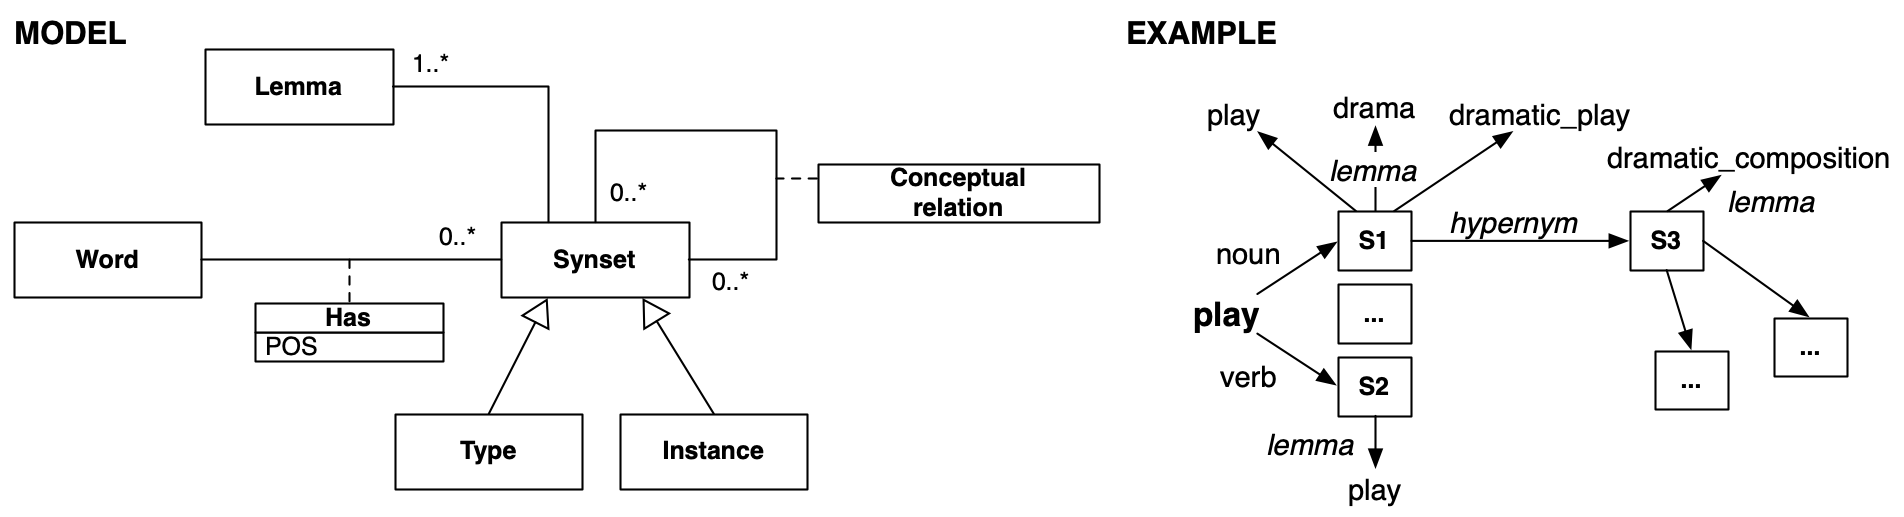

In [4]:
display(Image(filename='wordnet.png'))

In [6]:
word = 'studying'
synsets = wn.synsets(word)
print(len(synsets))
synsets[:3]

7


[Synset('perusal.n.01'), Synset('analyze.v.01'), Synset('study.v.02')]

### Part of speech

In [7]:
synsets = wn.synsets(word, pos=wn.VERB)
synsets[:3]

[Synset('analyze.v.01'), Synset('study.v.02'), Synset('study.v.03')]

### Anatomy of a synset

In [9]:
s = synsets[0]
display(s.definition())

'consider in detail and subject to an analysis in order to discover essential features or meaning'

In [10]:
display(s.examples())

['analyze a sonnet by Shakespeare',
 'analyze the evidence in a criminal trial',
 'analyze your real motives']

In [11]:
display(wn.synset('code.n.03').topic_domains())
display(wn.synset('pukka.a.01').region_domains())
display(wn.synset('freaky.a.01').usage_domains())

[Synset('computer_science.n.01')]

[Synset('india.n.01')]

[Synset('slang.n.02')]

In [12]:
display(s.lemmas())

[Lemma('analyze.v.01.analyze'),
 Lemma('analyze.v.01.analyse'),
 Lemma('analyze.v.01.study'),
 Lemma('analyze.v.01.examine'),
 Lemma('analyze.v.01.canvass'),
 Lemma('analyze.v.01.canvas')]

In [13]:
l = s.lemmas()[0]
l.name()

'analyze'

### Multilingual

In [14]:
ita = s.lemmas(lang='ita')
display(ita)

[Lemma('analyze.v.01.analizzare'),
 Lemma('analyze.v.01.esaminare'),
 Lemma('analyze.v.01.studiare')]

In [15]:
ita[0].synset()

Synset('analyze.v.01')

### Synset relations and lemma relations

In [16]:
z = wn.synsets('text', pos=wn.NOUN)[0]
z.definition()

'the words of something written'

In [17]:
display(z.hypernyms()[:3])
display(z.hyponyms()[:3])
display(z.member_holonyms()[:3])
display(z.lowest_common_hypernyms(wn.synset('word.n.01')))

[Synset('matter.n.06')]

[Synset('column.n.08'), Synset('cookie.n.03'), Synset('copy.n.03')]

[]

[Synset('abstraction.n.06')]

Antonyms, derivationally_related_forms and pertainyms are defined over lemmas

In [18]:
g = wn.synsets('good', pos=wn.ADJ)[0]
display(g.definition())

'having desirable or positive qualities especially those suitable for a thing specified'

In [19]:
display(g.lemmas()[0].antonyms())
display(g.lemmas()[0].derivationally_related_forms())
display(g.lemmas()[0].pertainyms())

[Lemma('bad.a.01.bad')]

[Lemma('good.n.03.goodness')]

[]

### Verb frames

In [ ]:
v = wn.synsets('bring', pos=wn.VERB)[0]
display(v.definition())
display(v.frame_ids(), v.lemmas()[0].frame_strings())

### Similarity

In [20]:
a = wn.synset('king.n.01')
b = wn.synset('queen.n.01')
display(a.path_similarity(b))
display(a.lch_similarity(b))
display(a.wup_similarity(b))

0.1

1.3350010667323402

0.5714285714285714

### Word lookup

In [21]:
display(wn.synsets('dogs', pos=wn.NOUN))
display(wn.morphy('dogs'))
display(wn.synsets(wn.morphy('dogs'), pos=wn.NOUN))

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01')]

'dog'

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01')]

### Synset closure

In [22]:
h = lambda s: s.hypernyms()
b = wn.synsets('book', wn.NOUN)[0]
for j in b.closure(h):
    print(j)

Synset('publication.n.01')
Synset('work.n.02')
Synset('product.n.02')
Synset('creation.n.02')
Synset('artifact.n.01')
Synset('whole.n.02')
Synset('object.n.01')
Synset('physical_entity.n.01')
Synset('entity.n.01')
